In [1]:
import warnings
warnings.filterwarnings('ignore')

<h1 style = "fontsize:400%;text-align:center;">QBUS3850: Time Series and Forecasting</h1>
<h2 style = "fontsize:300%;text-align:center;">Value at Risk</h2>
<h3 style = "fontsize:200%;text-align:center;">Lecture Notes</h3>

<h2 style = "fontsize:300%;text-align:center;">Risk Measures</h2>

# Value at Risk

- So far we have considered volatility (i.e. standard deviation/variance) as a measure of the riskiness of a stock.
- This is not the only measure of risk.
- In the 1990s, JP Morgan popularised another measure of risk known as Value at Risk.
- The Basel II banking accords made VaR the preferred measure of market risk

# VAR v VaR

- In this course we have already used VAR to denote a **V**ector **A**uto**R**egression.
- This is totally unrelated to **V**alue **a**t **R**isk.
- We use a lower case "a" in the risk measure.
- Try not to mix these up.

# What is VaR?

- Consider large negative returns (losses).
- Consider a 1 in 20, 1 in 100, or 1 in 1000 "bad" day.
- What is the minimum loss on such a day?
- This is the Value at Risk.
- Statistically it is just a quantile.

# Definition

- The h-step ahead VaR at a level $\alpha$ is given by 

$$\textrm{VaR}_{t+h|t}^{(\alpha)}=q:\textrm{Pr}(r_{t+h}<q|\mathcal{F}_t)=\alpha$$

- Where $r_{t+h}$ is the return (as a random variable) and $\mathcal{F}_t$ is all data up to and including time $t$.

# How do we estimate it?

- Non-parametrically (i.e. without a model)
  - In the finance context this is called *Historical Simulation*
- Parametrically (i.e. with a model and full distributional assumptions)
  - This is where ARCH/ GARCH/ EGARCH etc. can be used
- Semi-parametrically (i.e. with a model but no distributional assumption)
  - Quantile Regression
- The terms (semi/non)-parametric may mean different things in other contexts.

<h2 style = "fontsize:300%;text-align:center;">Estimating VaR</h2>

# Historical Simulation

- Simply find the sample quantile of returns data over some past period.
- Can use the full data, or the last $d$ observations where a common choice is $d=250$
- Effectively assumes a constant variance over the past $d$ periods, 
  - Since the estimate is refreshed with new data, VaR based on historical simulation will still vary over time.


# Parametric Method

- Naive model is to assume $r_t\overset{i.i.d.}{\sim}N(\mu,\sigma^2)$
- In this case the VaR is given by 

$$\textrm{VaR}_{t+h|t}^{(\alpha)}=\hat{\mu}+\Phi^{-1}(\alpha)\hat{\sigma}$$

where $\Phi^{-1}(.)$ is the inverse cdf of the normal. Similar expressions can be derived for other distributions.

# Using models

- Alternatively if we have a model for conditional mean and voliatility we can adjust the same formula to

$$\textrm{VaR}_{t+h|t}^{(\alpha)}=\hat{\mu}_{t+h|t}+\Phi^{-1}(\alpha)\hat{\sigma}_{t+h|t}$$

where $\hat{\mu}_{t+h|t}$ is the forecast mean and $\hat{\sigma}_{t+h|t}$ is the forecast standard deviation.

# Semi parametric method

- This is based on quantile regression.
- What is quantile regression?
- Need to understand the realtionships between loss functions, means and quantiles.
- First consider the case with just an intercept.

# Regression

- Least squares regression minimises squared loss.
- With only an intercept this is

$$\hat{\mu}=\underset{\mu}{argmin}\sum^n_{i=1}(y_i-\mu)^2$$

- Using squared error loss gives an estimate (the sample mean) that has good properties as an estimator of the expected value.
- If we replace $\mu$ with $\beta_0+\beta_1x_1+\dots+\beta_px_p$ we have a regression model.

# Absolute Loss

- What if we use absolute rather than squared losses?

$$\hat{\mu}=\underset{\mu}{argmin}\sum^n_{i=1}|y_i-\mu|$$

- This time $\hat{\mu}$ will be the sample *median*.
- This is a good estimate of the 50th percentile.
- The $\mu$ can be replaced with $\beta_0+\beta_1x_1+\dots+\beta_px_p$ - this is known as robust regression.

# Check loss

- For a quantile $\alpha$ consider

$$\hat{\mu}=\underset{\mu}{argmin}\sum^n_{i=1}\alpha I(y_t>\mu) |y_t-\mu|+(1-\alpha) I(y_t<\mu) |y_t-\mu|$$

where I(.) equals 1 if the statement in parentheses is true and 0 otherwise.

- This time $\hat{\mu}$ will be an estimate of the $\alpha$-percentile
- The $\mu$ can be replaced with $\beta_0+\beta_1x_1+\dots+\beta_px_p$.
- This is called quantile regression.

# Back to VaR

- Engle and Manganelli (2004) propose the CaViaR model

$$Q_t=\phi_0+\phi_1Q_{t-1}+\phi_2|r_{t-1}|$$

- Where $\phi_0,\phi_1$ and $\phi_2$ are found by

$$\sum^T_{i=1}\alpha (1-I_t)
|r_t-\phi_0+\phi_1Q_{t-1}+\phi_2|r_{t-1}||+(1-\alpha) 
I_t|r_t-\phi_0+\phi_1Q_{t-1}+\phi_2|r_{t-1}||$$
 
where $I_t=I(y_t<\mu)$ and $r_t$ are returns

- Other specifications proposed in same paper.

<h2 style = "fontsize:300%;text-align:center;">Evaluating VaR</h2>

# Loss Function

- We usually comapare forecasts of different methods/models using RMSE or MAE.
- Can you think of a loss function that can be used to evaluate VaR?

- We can use the Check loss function

# Check loss

Check loss has two parts.

$$\alpha I(r_t>\mu) |r_t-\mu|+(1-\alpha) I(r_t<\mu) |r_t-\mu|$$

Consider if $\alpha=0.05$

- If $I(r_t>\mu)$ (first part of sum above) the error is multiplied by a small number.
- If $I(r_t<\mu)$ (second part of sum above) the error is multiplied by a large number.  

# Backtesting

- Check loss will indicate which model is best
- But what if all models are bad?
- What does it mean to have an objectively good or bad VaR forecast?
- We might look for two properties regarding violations, i.e. return less than VaR ($I_t=1$)
  - Violations occur at the correct rate
  - Violations are unpredictable (i.e. not correlated over time).

# Backtesting

- There are a number of ways to test whether these two properties hold
- Collectively these are known as *backtesting*.
  - They involve hypothesis tests
  - They are usually carried out using forecasts obtained from a rolling window evaluation.

# Testing Violation Rate

- Consider the time series of violations $I_t=I(r_t<VaR_{t|t-h}^{\alpha})$ that can be constructed via a rolling window evaluation period of size $T_{\textrm{eval}}$.
- If VaR is correctly calibrated then $\textrm{Pr}(I_t=1)=\alpha$.
- This means that the proportion of violations asymptotically follows

$$\frac{\sum I_t/T_{\textrm{eval}}-\alpha}{\sqrt{\alpha(1-\alpha)/T_{\textrm{eval}}}}\sim N\left(0,1\right)$$

- This can be used to test the null that the VaR forecasts achieve the desired violation rate.

# Christoffersen test

- The Christoffersen (1998) test tests the null that violations are independent against an alternative that violations are an order 1 Markov process.
- Order 1 Markov means that 

$$\textrm{Pr}(I_t=1|I_{t-1},I_{t-2},\dots)=\textrm{Pr}(I_t=1|I_{t-1})$$

- The order 1 Markov process requires four probabilities that need to be estimated

$\delta_{11}=\textrm{Pr}(I_t=1|I_{t-1}=1)\,,\delta_{01}=\textrm{Pr}(I_t=1|I_{t-1}=0)\,,\delta_{10}=\textrm{Pr}(I_t=0|I_{t-1}=1),\quad\quad\delta_{00}=\textrm{Pr}(I_t=0|I_{t-1}=0)$

- This is tested against an independent model where $\delta_{01}=\delta_{11}=\alpha_1$ and $\delta_{00}=\delta_{10}=1-\alpha_1$



# Christoffersen test

- The likelihood ratio test can be used. Constained and unconstrained models are estimated by maximum likelihood.
- Maximum likelihood estimates are found by $\hat{\delta}_{jk}=m_{jk}/T_\textrm{eval}$ 
- Here $m_{11}$ equals the number of times a violation is followed by another violation, $m_{jk}$ similarly defined. Test statistic is

$$LR=-2(lnL_{u}-lnL_{r})\sim \chi^2_1$$

- Where $lnL_{u}=m_{11}ln(\hat{\delta}_{11})+m_{10}ln(\hat{\delta}_{10})+m_{01}ln(\hat{\delta}_{01})+m_{00}ln(\hat{\delta}_{00})$ and $lnL_{r}=m_{1}ln(\hat{\alpha}_1)+m_{0}ln(1-\hat{\alpha}_1)$
- Null is that violations are independent.


# Dynamic Quantile (DQ) Test

- The Christoffsen test can lack power (especially for small $\alpha$ when the number of violations is small.
- Problems arise when there are no violations followed by other violations.
- An alternative dynamic quantile test (also proposed by Engle and Manganelli (2004)) is more powerful.
- Everything can be done in a regression framwork.

# Dynamic Quantile (DQ) Test

- Construct a variable $\textrm{Hit}_t=I_t-\alpha$. Consider the regression

$$\textrm{Hit}_t=\beta_0+\sum\limits_{k=1}^K\beta_k \textrm{Hit}_{t-k}+\beta_{K+1}VaR^{(\alpha)}_{t|t-h}+\epsilon$$

- Null hypothesis is that $\beta_0=\beta_1=\dots=\beta_{K+1}=0$. This is equivalent to hits being independently sized and occuring with probability $\alpha$
- This can be tested with a Wald-test (similar to an F test)

# Dynamic Quantile (DQ) Test


Set

$$y=\begin{pmatrix}\textrm{Hit}_{K+1}\\\vdots\\\textrm{Hit}_{T_\textrm{eval}}\end{pmatrix}\,\,\textrm{and}\,\,
X=\begin{pmatrix}1& \textrm{Hit}_{K} & \textrm{Hit}_{K-1}&\cdots & \textrm{Hit}_{1} & VaR^{(\alpha)}_K\\
\vdots & \vdots & \vdots &\vdots & \vdots & \vdots\\
1& \textrm{Hit}_{T_\textrm{eval}-1} & \textrm{Hit}_{T_\textrm{eval}-2}&\cdots & \textrm{Hit}_{T_\textrm{eval}-K} & VaR^{(\alpha)}_{T_\textrm{eval}-1}
\end{pmatrix}$$

Test statistic is

$$DQ=\frac{y'X'(X'X)^{-1}Xy}{\alpha(1-\alpha)}\sim \chi^2_{K+2}$$

Common choice is $K=4$

<h2 style = "fontsize:300%;text-align:center;">Application</h2>

# Application

- Consider the BHP data (again...)
- Use historical simulation (window of 250) and a GARCH(1,1) model with normal residuals.
- Consider $\alpha=0.05$ VaR
- Evaluate using the last $T_{\textrm{eval}}=300$ observations.

# Import data

In [2]:
import pandas as pd
import numpy as np
bhp = pd.read_csv('BHP.AX.csv')
bhp['Date'] = pd.to_datetime(bhp['Date'])
ret=np.log(bhp['Close']).diff()[1:]
from arch import arch_model
Teval = 400
alpha = 0.05
HS_win = 250

# Rolling Window

In [3]:
VaR_HS = np.zeros(Teval)
VaR_GARCH = np.zeros(Teval)
for j in range(Teval):
    ret_train = ret[:-Teval+j]
    #Historical Simulation
    VaR_HS[j] = np.percentile(ret_train.tail(HS_win),q=alpha*100)
    #GARCH(1,1)
    garch = arch_model(ret_train,mean='Constant',vol='GARCH',p=1,q=1)
    garchfit=garch.fit(disp='off')
    fc=garchfit.forecast(horizon = 1)
    q = garch.distribution.ppf(alpha)
    VaR_GARCH[j] = fc.mean['h.1'].tail(1) + np.sqrt(fc.variance['h.1'].tail(1)) * q
    

# Loss function

In [4]:
Actual = ret.tail(Teval)
viol_HS = np.mean(Actual<VaR_HS)
print(viol_HS)
viol_GARCH = np.mean(Actual<VaR_GARCH)
print(viol_GARCH)
Loss_HS = (1-alpha)*np.where(Actual<VaR_HS,VaR_HS-Actual,0.0)+alpha*np.where(Actual>VaR_HS,Actual-VaR_HS,0.0)
Loss_GARCH = (1-alpha)*np.where(Actual<VaR_GARCH,VaR_GARCH-Actual,0.0)+alpha*np.where(Actual>VaR_GARCH,Actual-VaR_GARCH,0.0)
print(np.sum(Loss_HS))
print(np.sum(Loss_GARCH))

0.0725
0.0575
0.8984004092017148
0.8299383160537852


# DQ Test (Python Function)

In [5]:
import scipy.stats as stats
def dqtest(y,f,a,lag):
    n = len(y)
    hits = ((y<f)*1)*(1-a)
    hits = (hits)*1+(y>f)*(-a)
    q=2+lag
    
    if np.sum((y<f)*1) > 0:
        ns = n - lag
        xmat = np.column_stack([np.ones((ns,1)), f[lag:n+1]])
        for k in range(1,lag+1):
            lk = lag-k
            xmat = np.column_stack([xmat, hits[lk:n-k]])
    
        hx = np.dot((hits[lag:n+1]), xmat)
        xtx = np.linalg.lstsq(np.matmul(xmat.T, xmat), np.eye(q), rcond = None)[0]
        dq = np.dot(np.dot(hx, xtx), hx.T)
        dq = dq/(a*(1-a))
        pdq = 1 - stats.chi2.cdf(dq,q)
    else:
        pdq = np.nan
        dq = np.nan
    return pdq, dq

# DQ Test

In [6]:
print(dqtest(Actual,VaR_HS,alpha,4))
print(dqtest(Actual,VaR_GARCH,alpha,4))

(0.0014043083944342838, 21.644281794492716)
(0.062283215697564565, 11.985939377072487)


Reject null at 5% level of significance for HS but not for GARCH

# Visualise

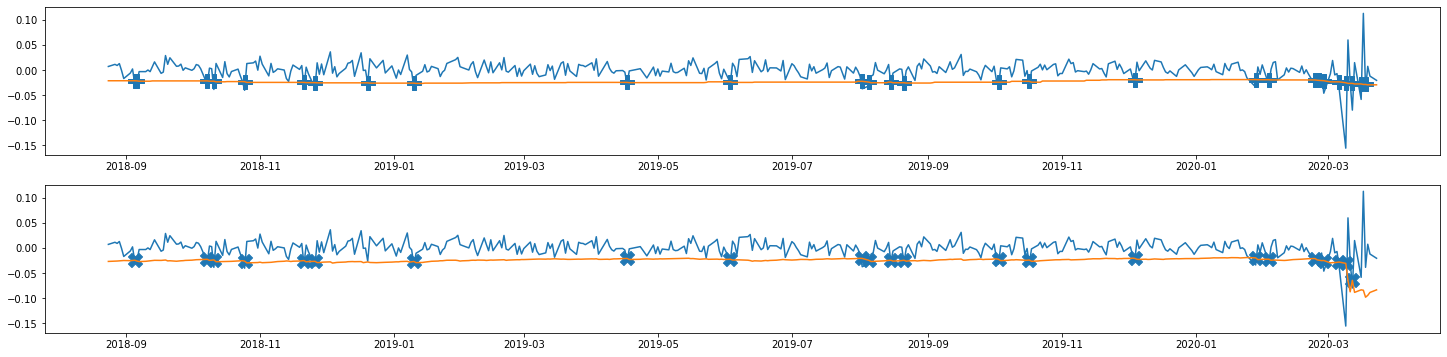

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,figsize= (25,6))
ax[0].plot(bhp['Date'].tail(Teval),Actual)
ax[1].plot(bhp['Date'].tail(Teval),Actual)
ax[0].plot(bhp['Date'].tail(Teval),VaR_HS)
ax[1].plot(bhp['Date'].tail(Teval),VaR_GARCH)
ax[0].scatter(bhp['Date'].tail(Teval).loc[Actual<VaR_HS],VaR_HS[Actual<VaR_HS],marker='P',s=200)
ax[1].scatter(bhp['Date'].tail(Teval).loc[Actual<VaR_GARCH],VaR_GARCH[Actual<VaR_GARCH],marker='X',s=200)

# Wrap up

- You now know how to compute and evaluate VaR. But there are criticisms of VaR
  - Gives a false sense of security - statistical models do not capture 'Black Swan' events.
  - VaR only gives an idea about violations and not about the size of the violation.
  - VaR is not subadditive - adding VaR for different stocks can be higher than the VaR of a portflio.
- We will discuss these issues (and some solutions) next week.